In [1]:
import pandas as pd
import pandas_ta as pta

In [2]:
import yfinance as yf

In [27]:
#df = 
we = yf.Ticker("MRNA")#.history(period="max")

In [30]:
my_list = dir(we)

In [41]:
df.columns = df.columns.str.lower()

<AxesSubplot:xlabel='Date'>

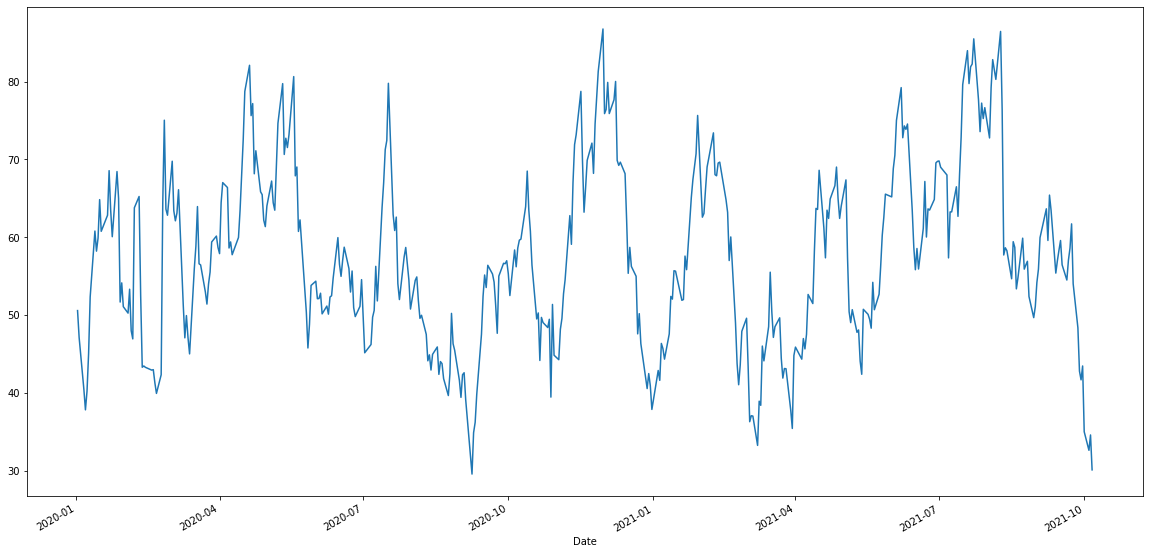

In [44]:
#df['close'].loc['2020-01-01':].plot(figsize=(20,10))
pta.rsi(df['close'], length = 14).loc['2020-01-01':].plot(figsize=(20,10))

In [2]:
def get_rsi(stk):
    df = yf.Ticker(stk).history(period="max")
    #df = df.ta.ticker(stk)
    df.columns = df.columns.str.lower()
    try:
        return pta.rsi(df['close'], length = 14).iloc[-30:].mean()
    except:
        print(stk)
        return None

In [16]:
def get_ao(stk):
    try:
        return df.ta.ticker(stk).ta.ao().iloc[-30:].mean()
    except:
        print(stk)
        return None

In [40]:
we = df.ta.ticker('MRNA').ta

In [49]:
my_list = dir(we)
algos = [item for item in my_list if not item.startswith('_')]

In [213]:
df.ta.ticker('MSFT').iloc[:-30]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-20,296.329987,298.720001,289.519989,294.299988,38278700,0.0,0.0
2021-09-21,295.690002,297.540009,294.070007,294.799988,22364100,0.0,0.0
2021-09-22,296.730011,300.220001,294.510010,298.579987,26626300,0.0,0.0


In [214]:
from tqdm import tqdm

def get_ao(stk):
    results = []
    try:
        ticker = df.ta.ticker(stk).iloc[:-30].ta
        for algo in tqdm(algos):
            try:
                results.append({algo: eval(f"ticker.{algo}().iloc[-30:].mean()")})
            except:
                print(algo)
    except:
        print(stk)
    return results

In [215]:
final_df = pd.DataFrame()

for _, col in df.iterrows():
    stk = col['stock']
    r = get_ao(stk)
    
    ultimate_dict = {}
    
    for item in r:
        try:
            key = list(item.keys())[0]
            value = float(list(item.values())[0])
            ultimate_dict[key] = value
        except:
            print(key)
        row = pd.DataFrame.from_dict(ultimate_dict, orient='index').rename(columns={0:stk}).T
    
    final_df = pd.concat([final_df, row])

 40%|███▉      | 55/139 [00:09<00:11,  7.03it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:13<00:04, 11.47it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:15<00:01, 17.38it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:15<00:00,  8.84it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:09<00:14,  5.71it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:12<00:02, 16.05it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 91%|█████████▏| 127/139 [00:13<00:00, 26.63it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:14<00:00,  9.76it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:19<00:49,  1.93it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:25<00:05,  8.59it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 84%|████████▍ | 117/139 [00:27<00:01, 11.69it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:28<00:00,  4.84it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:06<00:10,  8.29it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:09<00:02, 18.86it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:10<00:00, 29.18it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:10<00:00, 12.97it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


100%|██████████| 139/139 [00:00<00:00, 1939.96it/s]


hwc
psar
[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (p

 40%|███▉      | 55/139 [00:05<00:09,  9.29it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:08<00:03, 14.79it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:10<00:00, 25.88it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:10<00:00, 13.13it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:08<00:12,  6.55it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:11<00:02, 18.17it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:12<00:00, 28.58it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:12<00:00, 11.09it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:05<00:07, 11.13it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:07<00:01, 23.05it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:08<00:00, 36.64it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:08<00:00, 16.32it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:18<00:48,  2.00it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:26<00:08,  6.06it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 82%|████████▏ | 114/139 [00:29<00:03,  7.94it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:30<00:00,  4.63it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:04<00:07, 11.00it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 99/139 [00:06<00:01, 22.05it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:07<00:00, 34.14it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:07<00:00, 17.67it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:06<00:09,  9.24it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:08<00:01, 22.20it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:09<00:00, 33.37it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:09<00:00, 14.21it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 29%|██▉       | 41/139 [00:01<00:03, 29.07it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 79%|███████▉  | 110/139 [00:02<00:00, 77.78it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:02<00:00, 65.93it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj
- BRKB: No data found, symbol may be delisted
BRKB
- OGZD: No data found, symbol may be delisted
OGZD


 75%|███████▍  | 104/139 [00:00<00:00, 247.66it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

100%|██████████| 139/139 [00:00<00:00, 260.32it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:08<00:13,  6.15it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:12<00:02, 18.26it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:13<00:00, 27.74it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:13<00:00, 10.17it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:12<00:14,  5.90it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:17<00:04, 11.36it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:18<00:00, 18.09it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:19<00:00,  7.21it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 45%|████▍     | 62/139 [00:01<00:01, 52.02it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

100%|██████████| 139/139 [00:01<00:00, 88.95it/s] 

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo


cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:05<00:08, 10.16it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:07<00:01, 23.48it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:08<00:00, 36.33it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:08<00:00, 16.11it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:15<00:36,  2.62it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:21<00:05,  9.13it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 86%|████████▌ | 119/139 [00:23<00:01, 13.79it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:24<00:00,  5.72it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:12<00:15,  5.59it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:16<00:03, 12.29it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:17<00:00, 19.64it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:18<00:00,  7.66it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:18<00:48,  1.98it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:25<00:05,  8.51it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 81%|████████▏ | 113/139 [00:27<00:02,  9.03it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:28<00:00,  4.85it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:21<00:49,  1.93it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:27<00:05,  8.37it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 81%|████████▏ | 113/139 [00:31<00:03,  7.00it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:32<00:00,  4.32it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 45%|████▍     | 62/139 [00:01<00:01, 56.59it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

100%|██████████| 139/139 [00:01<00:00, 97.18it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze


fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|████      | 56/139 [00:02<00:02, 29.43it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 73%|███████▎  | 102/139 [00:03<00:00, 48.69it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 95%|█████████▍| 132/139 [00:03<00:00, 64.55it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:03<00:00, 35.08it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:06<00:11,  7.18it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:08<00:02, 20.02it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:09<00:00, 34.33it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:09<00:00, 13.92it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 29%|██▉       | 41/139 [00:01<00:04, 20.61it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 69%|██████▉   | 96/139 [00:02<00:00, 59.33it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


100%|██████████| 139/139 [00:02<00:00, 57.96it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj



 40%|████      | 56/139 [00:07<00:10,  7.76it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:09<00:01, 21.33it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:10<00:00, 34.41it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:10<00:00, 13.12it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:09<00:15,  5.49it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:13<00:03, 12.33it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 91%|█████████ | 126/139 [00:14<00:00, 24.97it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:15<00:00,  9.04it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:03<00:06, 12.44it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 73%|███████▎  | 102/139 [00:05<00:01, 26.37it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:06<00:00, 39.68it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:06<00:00, 20.50it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


100%|██████████| 139/139 [00:00<00:00, 473.45it/s]


[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 45%|████▍     | 62/139 [00:00<00:00, 77.64it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

100%|██████████| 139/139 [00:01<00:00, 133.82it/s]


[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:05<00:08, 10.37it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:08<00:02, 20.17it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 91%|█████████▏| 127/139 [00:09<00:00, 30.13it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:09<00:00, 14.25it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:06<00:10,  8.14it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:09<00:01, 21.06it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:10<00:00, 32.21it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:10<00:00, 13.05it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:01<00:04, 19.92it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 76%|███████▌  | 105/139 [00:02<00:00, 55.25it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:02<00:00, 55.85it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:04<00:06, 12.75it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 73%|███████▎  | 102/139 [00:05<00:01, 31.82it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 96%|█████████▌| 133/139 [00:06<00:00, 50.88it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:06<00:00, 22.56it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:11<00:18,  4.60it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:15<00:04, 12.17it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:17<00:00, 18.83it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:17<00:00,  7.89it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:07<00:11,  7.55it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:10<00:02, 19.89it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:11<00:00, 29.74it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:11<00:00, 11.84it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:21<00:54,  1.76it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:27<00:06,  7.85it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 81%|████████▏ | 113/139 [00:30<00:02,  8.89it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:31<00:00,  4.41it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:07<00:10,  7.71it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:09<00:02, 19.36it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:11<00:00, 28.05it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:11<00:00, 12.22it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:04<00:06, 12.13it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 73%|███████▎  | 102/139 [00:05<00:01, 32.01it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 96%|█████████▌| 133/139 [00:06<00:00, 52.91it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:06<00:00, 21.36it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:11<00:18,  4.65it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

/home/gerac/.local/lib/python3.9/site-packages/pandas_ta/overlap/linreg.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return rn / rd
 65%|██████▍   | 90/139 [00:15<00:04, 11.23it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:17<00:00, 18.36it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:17<00:00,  7.74it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:12<00:19,  4.31it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:16<00:04, 11.67it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:17<00:00, 19.18it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:18<00:00,  7.52it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 44%|████▍     | 61/139 [00:02<00:03, 25.48it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 74%|███████▍  | 103/139 [00:03<00:00, 47.72it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


100%|██████████| 139/139 [00:03<00:00, 37.97it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi


stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:06<00:09,  8.98it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:08<00:01, 21.57it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:09<00:00, 31.90it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:09<00:00, 14.25it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 44%|████▍     | 61/139 [00:02<00:02, 31.45it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:02<00:00, 45.77it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


100%|██████████| 139/139 [00:03<00:00, 43.80it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration


adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 45%|████▍     | 62/139 [00:01<00:01, 61.27it/s] 

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

100%|██████████| 139/139 [00:01<00:00, 104.98it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha


above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:12<00:18,  4.52it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:15<00:04, 11.51it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 89%|████████▉ | 124/139 [00:17<00:00, 22.32it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:17<00:00,  7.79it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 31%|███       | 43/139 [00:20<00:53,  1.79it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:27<00:06,  7.56it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 81%|████████▏ | 113/139 [00:29<00:02,  8.90it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:30<00:00,  4.51it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|████      | 56/139 [00:05<00:07, 10.88it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 71%|███████   | 98/139 [00:07<00:01, 21.62it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 92%|█████████▏| 128/139 [00:08<00:00, 34.81it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:08<00:00, 16.25it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 35%|███▍      | 48/139 [00:13<00:23,  3.87it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:17<00:04, 12.04it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:19<00:00, 18.50it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:19<00:00,  7.02it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 40%|███▉      | 55/139 [00:12<00:15,  5.46it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:16<00:04, 11.44it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:18<00:01, 16.45it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:19<00:00,  7.24it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 34%|███▍      | 47/139 [00:12<00:28,  3.24it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:16<00:04, 11.61it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:18<00:01, 17.14it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:19<00:00,  7.20it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 35%|███▍      | 48/139 [00:12<00:22,  4.10it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:17<00:04, 10.94it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:19<00:01, 16.12it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:20<00:00,  6.90it/s]


aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


 35%|███▌      | 49/139 [00:13<00:22,  3.95it/s]

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

 65%|██████▍   | 90/139 [00:17<00:04, 11.23it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number
[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] Ooops!!! It's True, the series 'b' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
cross


 87%|████████▋ | 121/139 [00:19<00:01, 16.71it/s]

[X] Ooops!!! It's True, the series 'a' was not found in Open, High, Low, Close, Volume, Dividends, Stock Splits
[X] value is not a number


100%|██████████| 139/139 [00:20<00:00,  6.91it/s]

aobv
vp
rvgi
thermo
kvo
cdl_z
tsi
stc
hwc
pvo
hilo
squeeze_pro
trix
td_seq
psar
xsignals
tsignals
squeeze
fisher
cdl_pattern
smi
dm
stoch
macd
qqe
aberration
adx
kc
supertrend
bbands
brar
vortex
cksp
ha
above_value
eri
short_run
below_value
ppo
long_run
amat
tos_stdevall
accbands
kst
stochrsi
aroon
donchian
kdj


In [218]:
final_df.dropna(inplace=True)

In [159]:
final_df.to_csv('loquehaya.csv')

In [137]:
pd.DataFrame.from_dict(ultimate_dict, orient='index').rename(columns={0:'SPOT'}).T

,quantile,mad,alma,wcp,kurtosis,atr,rvi,increasing,pwma,median,...,roc,vhf,bop,coppock,ohlc4,vwma,hma,ui,pvi,cci
SPOT,236.415168,10.627589,240.080564,252.866418,-0.452102,8.08594,57.286796,0.6,244.192067,236.415168,...,6.208319,0.370011,0.11606,8.597996,252.613,245.954145,252.122997,4.76543,1121.461039,64.752011


In [160]:
msft = yf.Ticker("MSFT")

In [219]:
def get_changes(stk):
    history = yf.Ticker(stk).history(period="max")
    change24hs = history.pct_change(periods=1).iloc[-1]["Open"]
    change7d = history.pct_change(periods=7).iloc[-1]["Open"]
    change30d = history.pct_change(periods=30).iloc[-1]["Open"]
    change90d = history.pct_change(periods=90).iloc[-1]["Open"]
    change180d = history.pct_change(periods=180).iloc[-1]["Open"]
    return pd.Series(
        [change24hs, change7d, change30d, change90d, change180d],
        index=[
            "change24hs", "change7d", "change30d", "change90d", "change180d"
        ],
    )

In [220]:
final_df[['change24hs', 'change7d', 'change30d', 'change90d', 'change180d']] = final_df.apply(lambda x: get_changes(x.name), axis=1)

In [222]:
final_df.to_csv('probar.csv')

In [200]:
dataset = final_df.dropna()

In [201]:
dataset.to_csv('cedears_dataset.csv')

In [206]:
final_df[['cfo','change24hs', 'change7d', 'change30d', 'change90d', 'change180d']].sort_values(by='cfo', ascending=False)

,cfo,change24hs,change7d,change30d,change90d,change180d
NOKA,8.251909,0.000000,-0.260785,NaN,NaN,NaN
QCOM,0.587573,0.004798,0.190465,0.180002,0.108546,0.120300
NVDA,0.466818,0.108634,0.233431,0.367784,0.509673,1.044682
X,0.418603,0.003417,0.118335,0.220609,0.137942,0.477554
ABEV,0.332717,0.012698,0.155797,0.092466,-0.075362,0.190298
WBA,0.237782,0.012581,0.029928,0.025905,-0.032052,0.042571
ETSY,0.197222,0.109756,0.058420,0.179638,0.293984,0.175536
SPOT,0.175276,-0.006100,0.086658,0.265260,0.070438,-0.187332
SHOP,0.153138,0.013007,0.125367,0.041780,0.038158,0.098170
ABBV,0.140609,-0.007145,0.065249,0.105504,0.064631,0.155310


In [ ]:
yf.Ticker('MSFT').history

In [84]:
algos = list(set(algos)-set(a))

In [ ]:
[
    ad,
    adosc,
    alma,
    ao,
    apo,
    atr,
    bias,
    bop,
    cci,
    cfo,
    cg,
    chop,
    cmf,
    cmo,
    coppock,
    cti,
    decay,
    decreasing,
    dema,
    dpo,
    ebsw,
    efi,
    ema,
    entropy,
    eom,
    er,
    fwma,
    hl2,
    hlc3,
    hma,
    hwma,
    jma,
    kama,
    kurtosis,
    linreg,
    log_return,
    mad,
    massi,
    mcgd,
    median,
    mfi,
    midpoint,
    midprice,
    mom,
    natr,
    nvi,
    obv,
    ohlc4,
    pdist,
    percent_return,
    pgo,
    psl,
    pvi,
    pvol,
    pvr,
    pvt,
    pwma,
    qstick,
    quantile,
    rma,
    toc,
    rsi,
    rsx,
    rvi,
    sinwma,
    skew,
    slope,
    sma,
    ssf,
    stdev,
    swma,
    t3,
    tema,
    trima,
    true_range,
    ui,
    uo,
    variance,
    vhf,
    vidya,
    vwap,
    vwma,
    wcp,
    willr,
    wma,
    zlma,
    zscore,
]

In [70]:
my_obj

[{'aberration': ABER_ZG_5_15     248.718528
  ABER_SG_5_15     256.770584
  ABER_XG_5_15     240.666472
  ABER_ATR_5_15      8.052056
  dtype: float64},
 {'above_value': Open            2.521027e+02
  High            2.569807e+02
  Low             2.482550e+02
  Close           2.530397e+02
  Volume          1.220710e+06
  Dividends       0.000000e+00
  Stock Splits    0.000000e+00
  dtype: float64},
 {'accbands': ACCBL_20    222.777330
  ACCBM_20    241.209034
  ACCBU_20    259.483668
  dtype: float64},
 {'ad': 70228358.55968148},
 {'adosc': 654318.5968693766},
 {'adx': ADX_14    21.593442
  DMP_14    29.786460
  DMN_14    17.998672
  dtype: float64},
 {'alma': 240.08056327669024},
 {'amat': AMATe_LR_8_21_2    0.766667
  AMATe_SR_8_21_2    0.233333
  dtype: float64},
 {'ao': 10.360590744018559},
 {'aobv': OBV          9.742188e+07
  OBV_min_2    9.662393e+07
  OBV_max_2    9.784464e+07
  OBVe_4       9.686661e+07
  OBVe_12      9.590290e+07
  AOBV_LR_2    6.666667e-01
  AOBV_SR_2    3

In [4]:
def get_rsi(stk):
    try:
        return df.ta.ticker(stk).ta.rsi().iloc[-30:].mean()
    except:
        print(stk)
        return None

In [5]:
def get_macd(stk):
    try:
        return df.ta.ticker(stk).ta.macd().iloc[-30:].mean()
    except:
        print(stk)
        return None

In [6]:
def get_stoch(stk):
    try:
        return df.ta.ticker(stk).ta.stoch().iloc[-30:].mean()
    except:
        print(stk)
        return None

In [15]:
def get_ao(stk):
    df = yf.Ticker(stk).history(period="max")
    df.columns = df.columns.str.lower()
    pta.ao(df['close'], df['low']).iloc[-30:].plot()#.iloc[-30:].mean()

In [8]:
def get_macd(stk):
    df = yf.Ticker(stk).history(period="max")
    #df = df.ta.ticker(stk)
    df.columns = df.columns.str.lower()
    try:
        return pta.macd(df['close'], length = 14).iloc[-30:].mean()
    except:
        print(stk)
        return None

In [56]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [9]:
get_rsi('MRNA')

MRNA


In [13]:
df = pd.read_csv('cedears.csv')

In [ ]:
tqdm.pandas()

In [143]:
for _, col in df.iterrows():
    print(col['stock'])

AAPL
X
KO
PBR
NOKA
NVDA
HMY
VALE
XOM
ITUB
HSBC
SQ
BRKB
OGZD
SNOW
QCOM
INTC
DESP
BBD
HAL
T
CVX
WFC
SPOT
GPRK
BIDU
SHOP
AUY
PAAS
MA
BBV
ZM
BB
PTR
ETSY
ARCO
CSCO
UGP
MO
CX
AVGO
UNH
HOG
PSX
BRFS
ABBV
DOCU
SAN
BP
ABEV
WBA
SLB
ERIC
GFI
HL


In [17]:
df['ao'] = df.stock.apply(lambda x: get_ao(x))

- BRKB: No data found, symbol may be delisted
BRKB
- OGZD: No data found, symbol may be delisted
OGZD


In [18]:
df['rsi'] = df.stock.apply(lambda x: get_rsi(x))

- BRKB: No data found, symbol may be delisted
BRKB
- OGZD: No data found, symbol may be delisted
OGZD
- BBV: None
BBV


In [19]:
df['macd'] = df.stock.apply(lambda x: get_macd(x))

- NOKA: None
NOKA
- BRKB: No data found, symbol may be delisted
BRKB


KeyboardInterrupt: 

In [ ]:
df['stoch'] = df.stock.apply(lambda x: get_stoch(x))

In [20]:
df.ao = pd.to_numeric(df.ao, errors='coerce')

In [23]:
df.rsi = pd.to_numeric(df.rsi, errors='coerce')

In [21]:
df.sort_values(by='ao', ascending=False)

,stock,price,ao,rsi
14,SNOW,1967.25,13.326712,59.772817
30,BBV,1311.50,9.215829,None
40,AVGO,2381.50,9.150588,57.028526
23,SPOT,1568.50,8.966349,58.320738
34,ETSY,2478.50,8.024321,56.547502
41,UNH,2272.00,7.076952,56.569431
21,CVX,2495.50,6.225745,67.734106
43,PSX,2464.25,5.397513,63.113649
5,NVDA,1632.25,4.697304,57.961972
8,XOM,2312.00,3.789993,64.709699


In [24]:
df.sort_values(by='rsi', ascending=False)

,stock,price,ao,rsi
21,CVX,2495.50,6.225745,67.734106
48,BP,NaN,1.985569,67.338603
24,GPRK,2759.25,1.632971,66.356343
19,HAL,2179.75,2.392280,65.677337
8,XOM,2312.00,3.789993,64.709699
10,HSBC,2622.00,1.455914,64.575553
43,PSX,2464.25,5.397513,63.113649
51,SLB,NaN,2.433410,62.468729
14,SNOW,1967.25,13.326712,59.772817
33,PTR,2486.00,3.153712,58.368811
